# 1 - Perkenalan

Nama: Tandya Anggergian

Batch: FTDS-10

Dataset: Kue Indonesia

This dataset contains images of various traditional cake/pastry/cookies from Indonesia, such as:
- Kue Klepon
- Kue Lumpur
- Kue Kastengel
- Kue Putri Salju
- Kue Serabi
- Kue Dadar Gulung
- Kue Lapis
- Kue Risoles

# 2 - Import Libraries

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Flatten

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping

from keras.preprocessing import image
from google.colab import files

from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# 3 - Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!mkdir ./kaggle
!mv ./kaggle.json ./kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle 

kaggle.json


In [ ]:
!kaggle datasets download -d ilhamfp31/kue-indonesia

 95% 287M/303M [00:01<00:00, 184MB/s]
100% 303M/303M [00:01<00:00, 167MB/s]


In [ ]:
! unzip -q /content/kue-indonesia.zip -d images

In [ ]:
os.listdir('/content/images/')

['test', 'validation', 'train']

In [ ]:
main_path = '/content/images/'

In [ ]:
train_dir = os.path.join(main_path, 'train')
test_dir = os.path.join(main_path, 'test')
val_dir = os.path.join(main_path, 'validation')

# 4 - Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Data train check.

In [ ]:
print('train set: \n' + '='*50)
num_dadar_gulung = len(os.listdir(os.path.join(train_dir, 'kue_dadar_gulung')))
num_kastengel = len(os.listdir(os.path.join(train_dir, 'kue_kastengel')))
num_klepon = len(os.listdir(os.path.join(train_dir, 'kue_klepon')))
num_lapis = len(os.listdir(os.path.join(train_dir, 'kue_lapis')))
num_lumpur = len(os.listdir(os.path.join(train_dir, 'kue_lumpur')))
num_putri_salju = len(os.listdir(os.path.join(train_dir, 'kue_putri_salju')))
num_risoles= len(os.listdir(os.path.join(train_dir, 'kue_risoles')))
num_serabi = len(os.listdir(os.path.join(train_dir, 'kue_serabi')))

print(f'Jumlah dadar gulung = {num_dadar_gulung}')
print(f'Jumlah kastengel = {num_kastengel}')
print(f'Jumlah klepon = {num_klepon}')
print(f'Jumlah lapis = {num_lapis}')
print(f'Jumlah lumpur = {num_lumpur}')
print(f'Jumlah putri salju = {num_putri_salju}')
print(f'Jumlah risoles = {num_risoles}')
print(f'Jumlah serabi = {num_serabi}')

train set: 
Jumlah dadar gulung = 192
Jumlah kastengel = 181
Jumlah klepon = 200
Jumlah lapis = 201
Jumlah lumpur = 198
Jumlah putri salju = 174
Jumlah risoles = 196
Jumlah serabi = 181


Data test check.

In [ ]:
print('test set: \n' + '='*50)
num_dadar_gulung_test = len(os.listdir(os.path.join(test_dir, 'kue_dadar_gulung')))
num_kastengel_test = len(os.listdir(os.path.join(test_dir, 'kue_kastengel')))
num_klepon_test = len(os.listdir(os.path.join(test_dir, 'kue_klepon')))
num_lapis_test = len(os.listdir(os.path.join(test_dir, 'kue_lapis')))
num_lumpur_test = len(os.listdir(os.path.join(test_dir, 'kue_lumpur')))
num_putri_salju_test = len(os.listdir(os.path.join(test_dir, 'kue_putri_salju')))
num_risoles_test= len(os.listdir(os.path.join(test_dir, 'kue_risoles')))
num_serabi_test = len(os.listdir(os.path.join(test_dir, 'kue_serabi')))

print(f'Jumlah dadar gulung = {num_dadar_gulung_test}')
print(f'Jumlah kastengel = {num_kastengel_test}')
print(f'Jumlah klepon = {num_klepon_test}')
print(f'Jumlah lapis = {num_lapis_test}')
print(f'Jumlah lumpur = {num_lumpur_test}')
print(f'Jumlah putri salju = {num_putri_salju_test}')
print(f'Jumlah risoles = {num_risoles_test}')
print(f'Jumlah serabi = {num_serabi_test}')

test set: 
Jumlah dadar gulung = 20
Jumlah kastengel = 22
Jumlah klepon = 20
Jumlah lapis = 20
Jumlah lumpur = 20
Jumlah putri salju = 20
Jumlah risoles = 20
Jumlah serabi = 20


Data validation check.

In [ ]:
print('test set: \n' + '='*50)
num_dadar_gulung_val = len(os.listdir(os.path.join(val_dir, 'kue_dadar_gulung')))
num_kastengel_val = len(os.listdir(os.path.join(val_dir, 'kue_kastengel')))
num_klepon_val = len(os.listdir(os.path.join(val_dir, 'kue_klepon')))
num_lapis_val = len(os.listdir(os.path.join(val_dir, 'kue_lapis')))
num_lumpur_val = len(os.listdir(os.path.join(val_dir, 'kue_lumpur')))
num_putri_salju_val = len(os.listdir(os.path.join(val_dir, 'kue_putri_salju')))
num_risoles_val= len(os.listdir(os.path.join(val_dir, 'kue_risoles')))
num_serabi_val = len(os.listdir(os.path.join(val_dir, 'kue_serabi')))

print(f'Jumlah dadar gulung = {num_dadar_gulung_val}')
print(f'Jumlah kastengel = {num_kastengel_val}')
print(f'Jumlah klepon = {num_klepon_val}')
print(f'Jumlah lapis = {num_lapis_val}')
print(f'Jumlah lumpur = {num_lumpur_val}')
print(f'Jumlah putri salju = {num_putri_salju_val}')
print(f'Jumlah risoles = {num_risoles_val}')
print(f'Jumlah serabi = {num_serabi_val}')

test set: 
Jumlah dadar gulung = 20
Jumlah kastengel = 20
Jumlah klepon = 20
Jumlah lapis = 20
Jumlah lumpur = 20
Jumlah putri salju = 20
Jumlah risoles = 20
Jumlah serabi = 20


After we know the number of images for each train, test, and validation, we take the picture for each category.

In [ ]:
train_dadar_gulung = glob.glob(train_dir+"/kue_dadar_gulung/*")
train_kastengel = glob.glob(train_dir+"/kue_kastengel/*")
train_klepon = glob.glob(train_dir+"/kue_klepon/*")
train_lapis = glob.glob(train_dir+"/kue_lapis/*")
train_lumpur = glob.glob(train_dir+"/kue_lumpur/*")
train_putri_salju = glob.glob(train_dir+"/kue_putri_salju/*")
train_risoles = glob.glob(train_dir+"/kue_risoles/*")
train_serabi = glob.glob(train_dir+"/kue_serabi/*")

test_dadar_gulung = glob.glob(test_dir+"/kue_dadar_gulung/*")
test_kastengel = glob.glob(test_dir+"/kue_kastengel/*")
test_klepon = glob.glob(test_dir+"/kue_klepon/*")
test_lapis = glob.glob(test_dir+"/kue_lapis/*")
test_lumpur = glob.glob(test_dir+"/kue_lumpur/*")
test_putri_salju = glob.glob(test_dir+"/kue_putri_salju/*")
test_risoles = glob.glob(test_dir+"/kue_risoles/*")
test_serabi = glob.glob(test_dir+"/kue_serabi/*")

val_dadar_gulung = glob.glob(val_dir+"/kue_dadar_gulung/*")
val_kastengel = glob.glob(val_dir+"/kue_kastengel/*")
val_klepon = glob.glob(val_dir+"/kue_klepon/*")
val_lapis = glob.glob(val_dir+"/kue_lapis/*")
val_lumpur = glob.glob(val_dir+"/kue_lumpur/*")
val_putri_salju = glob.glob(val_dir+"/kue_putri_salju/*")
val_risoles = glob.glob(val_dir+"/kue_risoles/*")
val_serabi = glob.glob(val_dir+"/kue_serabi/*")

Next, we create dataframe based on list of images.

In [ ]:
def create_dataframe(list_of_images):
    data = []
    for image in list_of_images:
        data.append((image, image.split('/')[-2]))
    return pd.DataFrame(data, columns=['images', 'label'])

train_df = create_dataframe(train_dadar_gulung + train_kastengel + train_klepon + train_lapis +
                            train_lumpur + train_putri_salju + train_risoles + train_serabi)
train_df = train_df.sample(frac=1, random_state=1).reset_index(drop=True)

test_df = create_dataframe(test_dadar_gulung + test_kastengel + test_klepon + test_lapis +
                           test_lumpur + test_putri_salju + test_risoles + test_serabi)
test_df = test_df.sample(frac=1, random_state=1).reset_index(drop=True)

val_df = create_dataframe(val_dadar_gulung + val_kastengel + val_klepon + val_lapis +
                          val_lumpur + val_putri_salju + val_risoles + val_serabi)
val_df = val_df.sample(frac=1, random_state=1).reset_index(drop=True)

Now we can see the dataframe based on the picture.

In [ ]:
print(train_df.shape)
train_df.head()

(1523, 2)


,images,label
0,/content/images/train/kue_lumpur/92.jpeg,kue_lumpur
1,/content/images/train/kue_putri_salju/75.jpg,kue_putri_salju
2,/content/images/train/kue_lapis/58.jpg,kue_lapis
3,/content/images/train/kue_risoles/116.jpg,kue_risoles
4,/content/images/train/kue_klepon/166.jpg,kue_klepon


In [ ]:
print(test_df.shape)
test_df.head()

(162, 2)


,images,label
0,/content/images/test/kue_klepon/18.jpg,kue_klepon
1,/content/images/test/kue_klepon/13.jpg,kue_klepon
2,/content/images/test/kue_putri_salju/17.jpg,kue_putri_salju
3,/content/images/test/kue_lapis/6.jpg,kue_lapis
4,/content/images/test/kue_serabi/2.jpg,kue_serabi


In [ ]:
print(val_df.shape)
val_df.head()

(160, 2)


,images,label
0,/content/images/validation/kue_kastengel/17.jpg,kue_kastengel
1,/content/images/validation/kue_klepon/18.jpg,kue_klepon
2,/content/images/validation/kue_dadar_gulung/11...,kue_dadar_gulung
3,/content/images/validation/kue_lumpur/4.jpg,kue_lumpur
4,/content/images/validation/kue_lumpur/8.jpg,kue_lumpur


Next, lest visualize the amount of picture of each label on each dataset.

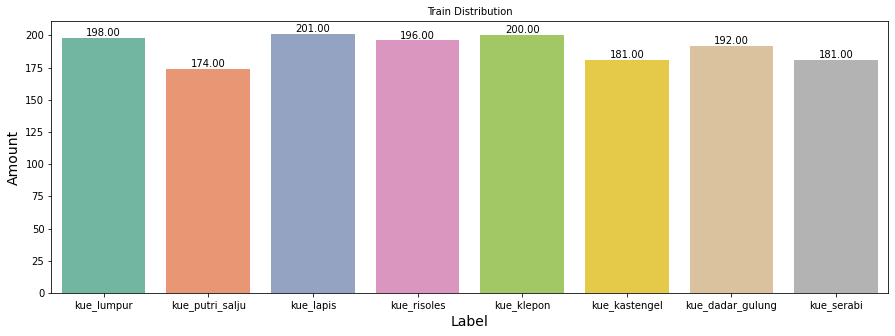

In [ ]:
def visualize_data(dataframe, label):
    fig, ax = plt.subplots(figsize =(15, 5))
    ax = sns.countplot(x='label', data=dataframe, palette='Set2')
    ax.set_title('Data Distribution')
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    
    plt.xlabel("Label", size=14)
    plt.ylabel("Amount", size=14)
    plt.title(f"{label} Distribution", size=10)
    plt.show()

visualize_data(train_df, 'Train')

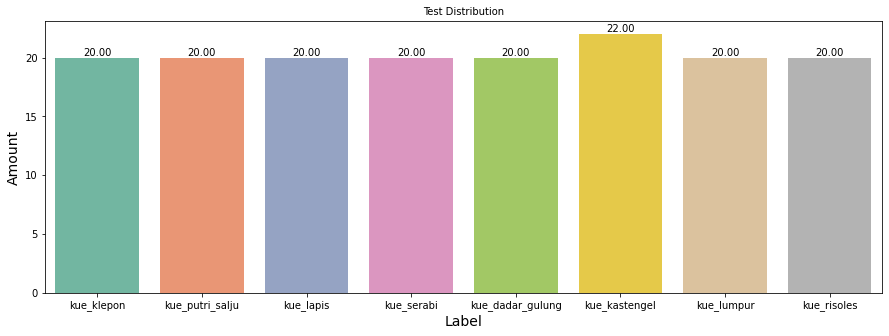

In [ ]:
visualize_data(test_df, 'Test')

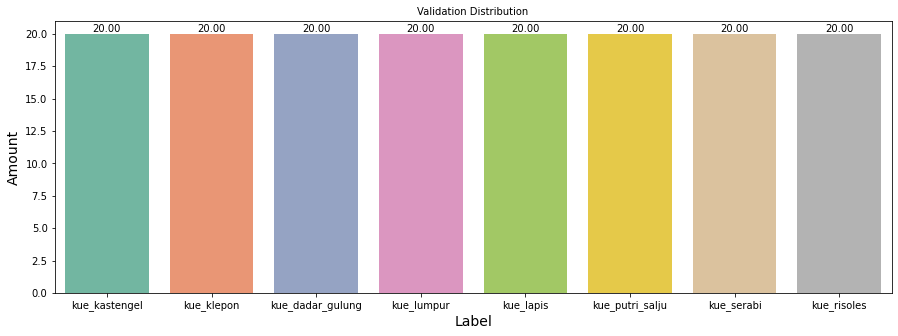

In [ ]:
visualize_data(val_df, 'Validation')

After that, let's see sample of each label.

In [ ]:
dadar_gulung_samples = (train_df[train_df['label']=="kue_dadar_gulung"]['images'].iloc[:3]).tolist()
kastengel_samples = (train_df[train_df['label']=="kue_kastengel"]['images'].iloc[:3]).tolist()
klepon_samples = (train_df[train_df['label']=="kue_klepon"]['images'].iloc[:3]).tolist()
lapis_samples = (train_df[train_df['label']=="kue_lapis"]['images'].iloc[:3]).tolist()
lumpur_samples = (train_df[train_df['label']=="kue_lumpur"]['images'].iloc[:3]).tolist()
putri_salju_samples = (train_df[train_df['label']=="kue_putri_salju"]['images'].iloc[:3]).tolist()
risoles_samples = (train_df[train_df['label']=="kue_risoles"]['images'].iloc[:3]).tolist()
serabi_samples = (train_df[train_df['label']=="kue_serabi"]['images'].iloc[:3]).tolist()

def visualize_samples(samples):
    fig, ax = plt.subplots(nrows=8, ncols=3, figsize=(20,40))
    for i, sample in enumerate(samples):
        img = cv2.imread(sample)
        ax[i//3, i%3].set_title(sample.split('/')[-2])
        ax[i//3, i%3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

visualize_samples(dadar_gulung_samples + kastengel_samples + klepon_samples +
                  lapis_samples + lumpur_samples + putri_salju_samples +
                  risoles_samples + serabi_samples)

As we can see here, the picture size are not uniformed. We will change it later on Data preprocessing.

# 5 - Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

---
## Setting

For this instance, we will set the height and width of the data. We also set the seed and batch so that the data can be stabilized.

In [ ]:
image_height = 210
image_width = 210
SEED = 17
BATCH = 32
np.random.seed(17)
tf.random.set_seed(17)

---
## Data Augmentation

According to Tensorflow, data augmentation is a technique  to increase the diversity of your training set by applying random (but realistic) transformations, such as image rotation.

[Source](https://www.tensorflow.org/tutorials/images/data_augmentation)

In this instance, we will use ImageDataGenerator. The reason is, according to Analyticsvidhya, ImageDataGenerator is one of the quickest and easist way to augment the image. This tools also help user with different augmentation technique such as standardization, rotation, shift, and many more.

[Source](https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.1,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    shear_range = 0.2,
    zoom_range = 0.2,
    brightness_range = [0.5, 1.5],
    fill_mode = 'nearest',
    vertical_flip = True,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1.255)

In [ ]:
ds_train = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'images',
    y_col = 'label',
    target_size = (image_height, image_width),
    class_mode = 'categorical',
    batch_size = BATCH,
    shuffle = True,
    seed = SEED)

ds_test = test_datagen.flow_from_dataframe(
    dataframe = test_df,
    x_col = 'images',
    y_col = 'label',
    target_size = (image_height, image_width),
    class_mode = 'categorical',
    batch_size = BATCH,
    shuffle = False,
    seed = SEED)

ds_val = val_datagen.flow_from_dataframe(
    dataframe = val_df,
    x_col = 'images',
    y_col = 'label',
    target_size = (image_height, image_width),
    class_mode = 'categorical',
    batch_size = BATCH,
    shuffle = True,
    seed = SEED)

Found 1516 validated image filenames belonging to 8 classes.
Found 160 validated image filenames belonging to 8 classes.
Found 160 validated image filenames belonging to 8 classes.


Now, let's see the dictionary of the mapping from class name.

In [ ]:
ds_train.class_indices

{'kue_dadar_gulung': 0,
 'kue_kastengel': 1,
 'kue_klepon': 2,
 'kue_lapis': 3,
 'kue_lumpur': 4,
 'kue_putri_salju': 5,
 'kue_risoles': 6,
 'kue_serabi': 7}

# 6 - Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

---
## Define Callbacks

According to Keras.io, callback is an object that can perform actions at various stages of training. 

By using callbacks, object can do thing at any stages such as start or end of epoch, before or after single batch, and many more.

[Source](https://keras.io/api/callbacks/)

In [ ]:
callback = [EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, verbose = 1),
            ModelCheckpoint('model_best.hdf5', monitor = 'val_loss', save_best_only = True),
            ReduceLROnPlateau(monitor = 'val_loss', mode = 'min', patience = 3, verbose = 1)]

On this occation, we will use basic CNN model and ResNet50 to see the differences. After that, we will tweak the best model to make it better.

---
## Define Model

### Basic CNN Model

In [ ]:
input = [image_height, image_width, 3]
model_basic = Sequential()
model_basic.add(Conv2D(filters = 64, kernel_size = 3, input_shape = input, activation = 'relu'))
model_basic.add(MaxPooling2D(pool_size = 2, strides = 2, padding = 'same'))
model_basic.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model_basic.add(MaxPooling2D(pool_size = 2, strides = 2, padding = 'same'))
model_basic.add(Flatten())
model_basic.add(Dense(units = 64, activation = 'relu'))
model_basic.add(Dense(units = 8, activation = 'softmax'))

model_basic.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

In [ ]:
model_basic.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 208, 208, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 104, 104, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 102, 102, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 51, 51, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 83232)             0         
                                                                 
 dense (Dense)               (None, 64)                5

### RestNet50 Model

In [ ]:
base = tf.keras.applications.ResNet50(input_shape = input, include_top = False, weights = 'imagenet')
model_rn = Sequential()
model_rn.add(base)
model_rn.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model_rn.add(MaxPooling2D(pool_size = 2, strides = 2, padding = 'same'))
model_rn.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model_rn.add(MaxPooling2D(pool_size = 2, strides = 2, padding = 'same'))
model_rn.add(Flatten())
model_rn.add(Dense(units = 64, activation = 'relu'))
model_rn.add(Dense(units = 8, activation = 'softmax'))

model_rn.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
model_rn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          1179712   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 1, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 32)               

# 7 - Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

---
## Basic Model

In [ ]:
model_basic_history = model_basic.fit(ds_train, batch_size = BATCH, epochs = 10,
                                      validation_data = ds_val, callbacks = callback, verbose = 1)

Epoch 1/10
48/48 [==============================] - 50s 811ms/step - loss: 2.1616 - accuracy: 0.1596 - val_loss: 223.3754 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 2/10
48/48 [==============================] - 36s 745ms/step - loss: 1.8175 - accuracy: 0.2896 - val_loss: 142.1827 - val_accuracy: 0.3187 - lr: 0.0010
Epoch 3/10
48/48 [==============================] - 36s 749ms/step - loss: 1.6371 - accuracy: 0.3615 - val_loss: 139.2281 - val_accuracy: 0.4062 - lr: 0.0010
Epoch 4/10
48/48 [==============================] - 35s 737ms/step - loss: 1.6139 - accuracy: 0.3740 - val_loss: 260.8315 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 5/10
48/48 [==============================] - 36s 756ms/step - loss: 1.5813 - accuracy: 0.3872 - val_loss: 184.0479 - val_accuracy: 0.4187 - lr: 0.0010
Epoch 6/10
48/48 [==============================] - ETA: 0s - loss: 1.5420 - accuracy: 0.4077

---
## RestNet50 Model

In [ ]:
model_rn_history = model_rn.fit(ds_train, batch_size = BATCH, epochs = 10,
                                      validation_data = ds_val, callbacks = callback, verbose = 1)

Epoch 1/10
48/48 [==============================] - 51s 895ms/step - loss: 2.0487 - accuracy: 0.2058 - val_loss: 11.1489 - val_accuracy: 0.0875 - lr: 0.0010
Epoch 2/10
48/48 [==============================] - 40s 830ms/step - loss: 1.9020 - accuracy: 0.2988 - val_loss: 963462.1250 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 3/10
48/48 [==============================] - 40s 832ms/step - loss: 1.8528 - accuracy: 0.2731 - val_loss: 11.9360 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 4/10
48/48 [==============================] - 42s 874ms/step - loss: 1.7600 - accuracy: 0.2777 - val_loss: 2.0722 - val_accuracy: 0.1312 - lr: 0.0010
Epoch 5/10
48/48 [==============================] - 41s 852ms/step - loss: 1.6025 - accuracy: 0.3080 - val_loss: 1.9993 - val_accuracy: 0.1937 - lr: 0.0010
Epoch 6/10
48/48 [==============================] - 40s 841ms/step - loss: 1.5657 - accuracy: 0.3311 - val_loss: 2.1450 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 7/10
48/48 [==============================] - 40s 8

# 8 - Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

---
## Basic Model

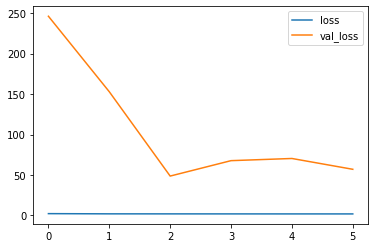

In [ ]:
metrics_basic = pd.DataFrame(model_basic_history.history)
metrics_basic[['loss', 'val_loss']].plot();

The basic model is really underfitting because the validation loss is greater than the training loss. This happened because the model cannot accurately model the training data.

For further examination let's see the accuracy.

In [ ]:
y_pred_basic = model_basic.predict(ds_test)
y_pred_basic = np.argmax(y_pred_basic, axis=1)
print(classification_report(ds_test.classes, y_pred_basic))

              precision    recall  f1-score   support

           0       0.13      0.15      0.14        20
           1       0.27      0.27      0.27        22
           2       0.33      0.30      0.32        20
           3       0.11      0.05      0.07        20
           4       1.00      0.05      0.10        20
           5       0.25      0.28      0.26        18
           6       0.29      0.80      0.43        20
           7       0.42      0.25      0.31        20

    accuracy                           0.27       160
   macro avg       0.35      0.27      0.24       160
weighted avg       0.35      0.27      0.24       160



As we can see here, the model cannot predict properly with accuracy that low. Next, let's see the other model.

---
## RestNet50 Model

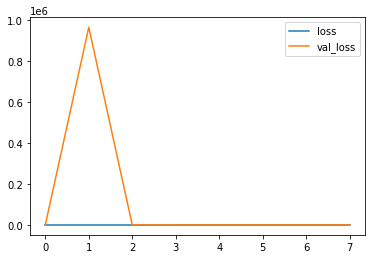

In [ ]:
metrics_rn = pd.DataFrame(model_rn_history.history)
metrics_rn[['loss', 'val_loss']].plot();

In this model, we can see that the model fit perfectly. To make it sure, let's see the accuracy.

In [ ]:
y_pred_rn = model_rn.predict(ds_test)
y_pred_rn = np.argmax(y_pred_rn, axis=1)
print(classification_report(ds_test.classes, y_pred_rn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.12      1.00      0.22        20
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        20

    accuracy                           0.12       160
   macro avg       0.02      0.12      0.03       160
weighted avg       0.02      0.12      0.03       160



Apparently the basic model has a better accuracy than the RestNet 50, eventhough the basic model is severely underfitted. In order to make it better, we will do model improvement.

---
## Model Improvement

#### 1st Improvement

First, let's test the model if we add dropout layer.

In [ ]:
input = [image_height, image_width, 3]
model_basic_imp = Sequential()
model_basic_imp.add(Conv2D(filters = 64, kernel_size = 3, input_shape = input, activation = 'relu'))
model_basic_imp.add(MaxPooling2D(pool_size = 2, strides = 2, padding = 'same'))
model_basic_imp.add(Dropout(0.5))
model_basic_imp.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model_basic_imp.add(MaxPooling2D(pool_size = 2, strides = 2, padding = 'same'))
model_basic_imp.add(Dropout(0.5))
model_basic_imp.add(Flatten())
model_basic_imp.add(Dense(units = 64, activation = 'relu'))
model_basic_imp.add(Dropout(0.5))
model_basic_imp.add(Dense(units = 8, activation = 'softmax'))

model_basic_imp.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

In [ ]:
model_basic_imp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 208, 208, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 104, 104, 64)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 104, 104, 64)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 102, 102, 32)      18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 51, 51, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 51, 51, 32)       

In [ ]:
model_basic_imp_history = model_basic_imp.fit(ds_train, batch_size = BATCH, epochs = 10,
                                      validation_data = ds_val, callbacks = callback, verbose = 1)

Epoch 1/10
48/48 [==============================] - 36s 741ms/step - loss: 2.2961 - accuracy: 0.1234 - val_loss: 2.0796 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 2/10
48/48 [==============================] - 35s 727ms/step - loss: 2.0778 - accuracy: 0.1385 - val_loss: 2.1099 - val_accuracy: 0.1625 - lr: 0.0010
Epoch 3/10
48/48 [==============================] - 35s 737ms/step - loss: 2.0787 - accuracy: 0.1365 - val_loss: 2.2672 - val_accuracy: 0.1375 - lr: 0.0010
Epoch 4/10
48/48 [==============================] - ETA: 0s - loss: 2.0787 - accuracy: 0.1339
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
48/48 [==============================] - 35s 734ms/step - loss: 2.0787 - accuracy: 0.1339 - val_loss: 2.2935 - val_accuracy: 0.1312 - lr: 0.0010
Epoch 4: early stopping


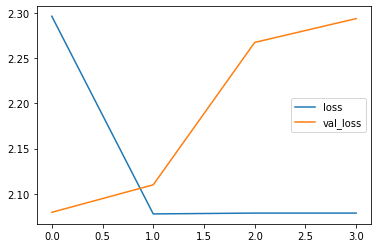

In [ ]:
metrics_model_basic_imp = pd.DataFrame(model_basic_imp_history.history)
metrics_model_basic_imp[['loss', 'val_loss']].plot();

Here we can see the model is overfitted. Let's see the accuracy score.

In [ ]:
y_pred_model_imp = model_basic_imp.predict(ds_test)
y_pred_model_imp = np.argmax(y_pred_model_imp, axis=1)
print(classification_report(ds_test.classes, y_pred_model_imp))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        20
           3       0.13      1.00      0.23        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        20

    accuracy                           0.12       160
   macro avg       0.02      0.12      0.03       160
weighted avg       0.02      0.12      0.03       160



Apparently the accuracy score is worsened, this happened because the model is overfitted. Let's tweak it again.

#### 2nd Improvement

In [ ]:
input = [image_height, image_width, 3]
model_basic_imp_2 = Sequential()
model_basic_imp_2.add(Conv2D(filters = 64, kernel_size = 3, input_shape = input, activation = 'relu'))
model_basic_imp_2.add(MaxPooling2D(pool_size = 2, strides = 2))
model_basic_imp_2.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model_basic_imp_2.add(MaxPooling2D(pool_size = 2, strides = 2))
model_basic_imp_2.add(Flatten())
model_basic_imp_2.add(Dense(units = 32, activation = 'relu'))
model_basic_imp_2.add(Dropout(0.5))
model_basic_imp_2.add(Dense(units = 8, activation = 'softmax'))

model_basic_imp_2.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

In [ ]:
model_basic_imp_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 208, 208, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 104, 104, 64)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 102, 102, 32)      18464     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 51, 51, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 83232)             0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [ ]:
model_basic_imp_2_history = model_basic_imp_2.fit(ds_train, batch_size = BATCH, epochs = 10,
                                      validation_data = ds_val, callbacks = callback, verbose = 1)

Epoch 1/10
48/48 [==============================] - 37s 757ms/step - loss: 2.0903 - accuracy: 0.1807 - val_loss: 71.9603 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 2/10
48/48 [==============================] - 35s 726ms/step - loss: 1.9257 - accuracy: 0.2361 - val_loss: 140.5985 - val_accuracy: 0.2812 - lr: 0.0010
Epoch 3/10
48/48 [==============================] - 36s 741ms/step - loss: 1.8903 - accuracy: 0.2454 - val_loss: 98.9138 - val_accuracy: 0.3187 - lr: 0.0010
Epoch 4/10
48/48 [==============================] - 35s 736ms/step - loss: 1.8354 - accuracy: 0.2454 - val_loss: 63.2400 - val_accuracy: 0.3187 - lr: 0.0010
Epoch 5/10
48/48 [==============================] - 35s 720ms/step - loss: 1.8124 - accuracy: 0.2520 - val_loss: 82.1391 - val_accuracy: 0.3250 - lr: 0.0010
Epoch 6/10
48/48 [==============================] - 34s 719ms/step - loss: 1.7805 - accuracy: 0.2645 - val_loss: 118.3232 - val_accuracy: 0.2875 - lr: 0.0010
Epoch 7/10
48/48 [==============================] - ETA:

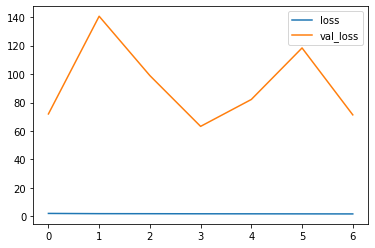

In [ ]:
metrics_model_basic_imp_2 = pd.DataFrame(model_basic_imp_2_history.history)
metrics_model_basic_imp_2[['loss', 'val_loss']].plot();

In [ ]:
y_pred_model_imp_2 = model_basic_imp_2.predict(ds_test)
y_pred_model_imp_2 = np.argmax(y_pred_model_imp_2, axis=1)
print(classification_report(ds_test.classes, y_pred_model_imp_2))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        20
           1       0.29      0.09      0.14        22
           2       0.64      0.70      0.67        20
           3       0.46      0.30      0.36        20
           4       0.10      0.05      0.07        20
           5       0.67      0.44      0.53        18
           6       0.29      1.00      0.44        20
           7       0.25      0.05      0.08        20

    accuracy                           0.41       160
   macro avg       0.42      0.42      0.37       160
weighted avg       0.41      0.41      0.37       160



Well, there's an improvement on accuracy and it's quite a lot, around 30%. Unfortunately the model is still underfitted. Let's try to tweak it again one more time.

#### 3rd Improvement

In [ ]:
input = [image_height, image_width, 3]
model_basic_imp_3 = Sequential()
model_basic_imp_3.add(Conv2D(filters = 16, kernel_size = 3, input_shape = input, activation = 'relu'))
model_basic_imp_3.add(MaxPooling2D(pool_size = 2, strides = 2))
model_basic_imp_3.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))
model_basic_imp_3.add(MaxPooling2D(pool_size = 2, strides = 2))
model_basic_imp_3.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model_basic_imp_3.add(MaxPooling2D(pool_size = 2, strides = 2))
model_basic_imp_3.add(Flatten())
model_basic_imp_3.add(Dense(units = 256, activation = 'relu'))
model_basic_imp_3.add(Dropout(0.5))
model_basic_imp_3.add(Dense(units = 8, activation = 'softmax'))

model_basic_imp_3.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

In [ ]:
model_basic_imp_3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 208, 208, 16)      448       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 104, 104, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 102, 102, 16)      2320      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 51, 51, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 49, 49, 32)        4640      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 24, 24, 32)     

In [ ]:
model_basic_imp_3_history = model_basic_imp_3.fit(ds_train, batch_size = BATCH, epochs = 10,
                                      validation_data = ds_val, callbacks = callback, verbose = 1)

Epoch 1/10
48/48 [==============================] - 36s 743ms/step - loss: 1.9815 - accuracy: 0.2210 - val_loss: 127.8958 - val_accuracy: 0.3625 - lr: 0.0010
Epoch 2/10
48/48 [==============================] - 34s 716ms/step - loss: 1.7156 - accuracy: 0.3239 - val_loss: 113.5534 - val_accuracy: 0.3938 - lr: 0.0010
Epoch 3/10
48/48 [==============================] - 35s 722ms/step - loss: 1.6129 - accuracy: 0.3826 - val_loss: 138.0186 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 4/10
48/48 [==============================] - 34s 700ms/step - loss: 1.5239 - accuracy: 0.4182 - val_loss: 125.6262 - val_accuracy: 0.3812 - lr: 0.0010
Epoch 5/10
48/48 [==============================] - ETA: 0s - loss: 1.4996 - accuracy: 0.4413
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
48/48 [==============================] - 35s 727ms/step - loss: 1.4996 - accuracy: 0.4413 - val_loss: 124.5439 - val_accuracy: 0.4750 - lr: 0.0010
Epoch 5: early stopping


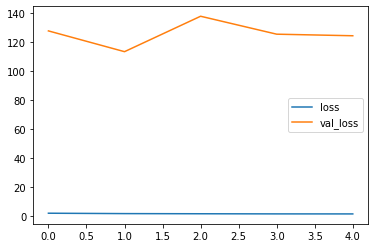

In [ ]:
metrics_model_basic_imp_3 = pd.DataFrame(model_basic_imp_3_history.history)
metrics_model_basic_imp_3[['loss', 'val_loss']].plot();

In [ ]:
y_pred_model_imp_3 = model_basic_imp_3.predict(ds_test)
y_pred_model_imp_3 = np.argmax(y_pred_model_imp_3, axis=1)
print(classification_report(ds_test.classes, y_pred_model_imp_3))

              precision    recall  f1-score   support

           0       0.54      0.75      0.63        20
           1       0.75      0.14      0.23        22
           2       0.94      0.80      0.86        20
           3       0.50      0.60      0.55        20
           4       0.48      0.70      0.57        20
           5       0.88      0.83      0.86        18
           6       0.54      1.00      0.70        20
           7       0.75      0.15      0.25        20

    accuracy                           0.61       160
   macro avg       0.67      0.62      0.58       160
weighted avg       0.67      0.61      0.57       160



The model is still overly underfitted, but the accuracy is getting better. According to Baeldung, underfitted happen because the model need more training data. Hence, in further improvement, we need to gather more data for the train dataset to make the model better.

[Source](https://www.baeldung.com/cs/training-validation-loss-deep-learning)

For now I will stick with this model and save this model.

In [ ]:
model_basic_imp_3.save('model_best.h5')
print('saved')

saved


# 9 - Model Inference

Here in model inference, I will use some photos I found on the internet to see whether the model can predict properly or not.

Saving images_Kue_Lapis_Kue-Lapis-Tepung-Beras.jpg to images_Kue_Lapis_Kue-Lapis-Tepung-Beras.jpg


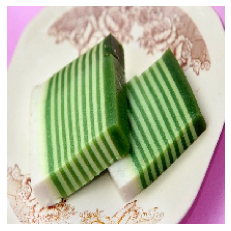

[[1. 0. 0. 0. 0. 0. 0. 0.]]
Kue Dadar Gulung


In [ ]:
upload_pics = files.upload()

for fn in upload_pics.keys():
  path = fn
  img = image.load_img(path, target_size=(210,210))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_basic_imp_3.predict(images)
  print(classes) 
  if classes[0][7] == 1:
    print('Kue Serabi')
  elif classes[0][6] == 1:
    print('Kue Risoles')
  elif classes[0][5] == 1:
    print('Kue Putri Salju')
  elif classes[0][4] == 1:
    print('Kue Lumpur')
  elif classes[0][3] == 1:
    print('Kue Lapis')
  elif classes[0][2] == 1:
    print('Kue Klepon')
  elif classes[0][1] == 1:
    print('Kue Kastengel')
  elif classes[0][0] == 1:
    print('Kue Dadar Gulung')

Saving Resep-kastengel-keju-edam-min.jpg to Resep-kastengel-keju-edam-min (2).jpg


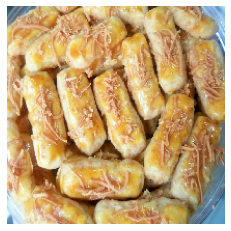

[[0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 6.260778e-23 0.000000e+00]]
Kue Kastengel


In [ ]:
upload_pics = files.upload()

for fn in upload_pics.keys():
  path = fn
  img = image.load_img(path, target_size=(210,210))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_basic_imp_3.predict(images)
  print(classes) 
  if classes[0][7] == 1:
    print('Kue Serabi')
  elif classes[0][6] == 1:
    print('Kue Risoles')
  elif classes[0][5] == 1:
    print('Kue Putri Salju')
  elif classes[0][4] == 1:
    print('Kue Lumpur')
  elif classes[0][3] == 1:
    print('Kue Lapis')
  elif classes[0][2] == 1:
    print('Kue Klepon')
  elif classes[0][1] == 1:
    print('Kue Kastengel')
  elif classes[0][0] == 1:
    print('Kue Dadar Gulung')

Saving dadar-gulung-isi-enten-nangka.jpeg to dadar-gulung-isi-enten-nangka.jpeg


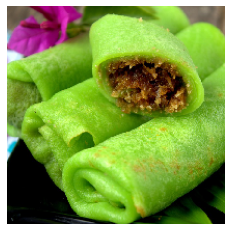

[[1. 0. 0. 0. 0. 0. 0. 0.]]
Kue Dadar Gulung


In [ ]:
upload_pics = files.upload()

for fn in upload_pics.keys():
  path = fn
  img = image.load_img(path, target_size=(210,210))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_basic_imp_3.predict(images)
  print(classes) 
  if classes[0][7] == 1:
    print('Kue Serabi')
  elif classes[0][6] == 1:
    print('Kue Risoles')
  elif classes[0][5] == 1:
    print('Kue Putri Salju')
  elif classes[0][4] == 1:
    print('Kue Lumpur')
  elif classes[0][3] == 1:
    print('Kue Lapis')
  elif classes[0][2] == 1:
    print('Kue Klepon')
  elif classes[0][1] == 1:
    print('Kue Kastengel')
  elif classes[0][0] == 1:
    print('Kue Dadar Gulung')

Saving indonesian-klepon-coconut-pandan-recipe-ft.jpg to indonesian-klepon-coconut-pandan-recipe-ft (3).jpg


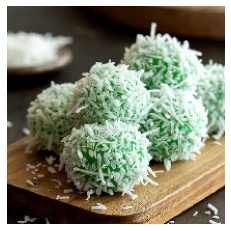

[[0. 0. 1. 0. 0. 0. 0. 0.]]
Kue Klepon


In [ ]:
upload_pics = files.upload()

for fn in upload_pics.keys():
  path = fn
  img = image.load_img(path, target_size=(210,210))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_basic_imp_3.predict(images)
  print(classes) 
  if classes[0][7] == 1:
    print('Kue Serabi')
  elif classes[0][6] == 1:
    print('Kue Risoles')
  elif classes[0][5] == 1:
    print('Kue Putri Salju')
  elif classes[0][4] == 1:
    print('Kue Lumpur')
  elif classes[0][3] == 1:
    print('Kue Lapis')
  elif classes[0][2] == 1:
    print('Kue Klepon')
  elif classes[0][1] == 1:
    print('Kue Kastengel')
  elif classes[0][0] == 1:
    print('Kue Dadar Gulung')

The model can predict some of the picture properly. But, some pictures are miss predicted. This happened because the pictures in training dataset are not enough.

Now, let's see if we use cakes that doesn't listed on the model.

Saving d9092451-668c-4680-94c0-dddcd0c9df12.jpeg to d9092451-668c-4680-94c0-dddcd0c9df12.jpeg


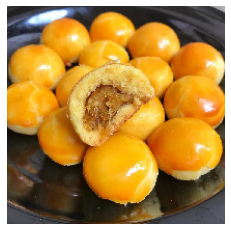

[[0. 0. 0. 0. 0. 0. 1. 0.]]
Kue Risoles


In [ ]:
upload_pics = files.upload()

for fn in upload_pics.keys():
  path = fn
  img = image.load_img(path, target_size=(210,210))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_basic_imp_3.predict(images)
  print(classes) 
  if classes[0][7] == 1:
    print('Kue Serabi')
  elif classes[0][6] == 1:
    print('Kue Risoles')
  elif classes[0][5] == 1:
    print('Kue Putri Salju')
  elif classes[0][4] == 1:
    print('Kue Lumpur')
  elif classes[0][3] == 1:
    print('Kue Lapis')
  elif classes[0][2] == 1:
    print('Kue Klepon')
  elif classes[0][1] == 1:
    print('Kue Kastengel')
  elif classes[0][0] == 1:
    print('Kue Dadar Gulung')

Apparently it predict nastar picture as risoles. This also happened because we don't have enough data to train the model.

To make a better model, there are some things that can be done, such as:
- Add more picture for each categories in data train.
- Tune the model better so the model can be a good fit and have better accuracy.

# 10 - Conclusion

- The dataset is about Indonesian traditional cakes.

- There are 8 labels on this dataset, which are:
  - kue_dadar_gulung
  - kue_kastengel
  - kue_klepon
  - kue_lapis
  - kue_lumpur
  - kue_putri_salju
  - kue_risoles
  - kue_serabi

- For this instance I use the setting as follow:
  - image_height = 210
  - image_width = 210
  - SEED = 17
  - BATCH = 32
  - np.random.seed(17)
  - tf.random.set_seed(17)

- I did data augmentation to increase the diversity of your training set by applying random (but realistic) transformations, such as image rotation.

- I set the callback for checkpoint, early stopping and reduce learning rate.

- On this occation, I used basic CNN model and ResNet50 to see the differences. After that, I tweak the best model to make it better.

- Basic CNN Model is the best model and the I tweak it to make some improvement.

- After tweaking the model, I got basic_model_imp_3 with accuracy of 61%. Unfortunately, the model is still underfitted.

- There are several reasons why is the model still underfitted, but in my opinion, this happened because the model need more training data.

- For further improvement, I need to gather more data for the train dataset to make the model better.

- The model can predict some of the picture properly. But, some pictures are miss predicted. This happened because the pictures in training dataset are not enough.

- For future research, add more picture for each categories in data train and tune the model more to make a better model.